## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

b. Use the cell below to find the number of rows in the dataset.

In [7]:
# Number of rows
len(df)

294478

In [8]:
# Number of duplicated rows
sum(df.duplicated())

0

c. The number of unique users in the dataset.

In [9]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [10]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [11]:
df.query('group == "treatment" & landing_page != "new_page"').count()[1] + df.query('group != "treatment" & landing_page == "new_page"').count()[1]

3893

f. Do any of the rows have missing values?

In [12]:
df.isna().values.any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
# Copying df and store it to df2
df2 = df.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
# Dropping missmatched group and page
df2.drop(df2.query('group == "treatment" & landing_page != "new_page"').index, inplace=True)
df2.drop(df2.query('group == "control" & landing_page != "old_page"').index, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id'].duplicated()].index

Int64Index([2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# Dropping duplicated user_id
df2.drop(df2[df2['user_id'].duplicated()].index, inplace=True)

# Finding any duplicate
df2.duplicated().values.any()

False

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
control_prob = df2[df2['group'] == "control"].converted.mean()
control_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
treatment_prob = df2[df2['group'] == "treatment"].converted.mean()
treatment_prob

0.11880806551510564

In [24]:
# Probability difference between control and treatment group
diff = treatment_prob - control_prob
diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [25]:
df2[df2['landing_page'] == "new_page"].count()[0] / df2['landing_page'].count()

0.50006194422266881

In [26]:
# Calculating length of the test
df2['timestamp'].max() - df2['timestamp'].min()

Timedelta('21 days 23:59:49.081927')

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**<br>
>From statictic above, we can see that the convertion probability decreases 0.16% in treatment group. For the test length of about 22 days, this value can be seen as not only not statictically significant, but also not practically significant.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
>$$H_{0}:p_{new} - p_{old} \leq 0$$<br>
$$H_{1}:p_{new} - p_{old} >  0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [27]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [28]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [29]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [30]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
# Creating sample for calculation below
df2_sample = df2.sample(df2.shape[0])

# Sample of converted + new page
new_page_converted = df2_sample.query('landing_page == "new_page"')['converted']

# Calculating probability of p_new
p_new = new_page_converted.mean()
p_new

0.11880806551510564

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
# Sample of converted + old page
old_page_converted = df2_sample.query('landing_page == "old_page"')['converted']

# Calculating probability of p_old
p_old = old_page_converted.mean()
p_old

0.1203863045004612

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
obs_diff = p_new - p_old
obs_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [34]:
p_diffs = []

for i in range(10000):
    bootsample = df2.sample(df2.shape[0], replace=True)
    bootsample_new = bootsample.query('landing_page == "new_page"')['converted']
    bootsample_old = bootsample.query('landing_page == "old_page"')['converted']
    p_new = bootsample_new.mean()
    p_old = bootsample_old.mean()
    p_diffs.append(p_new - p_old)

In [35]:
np.mean(p_diffs)

-0.0015802904246180742

In [36]:
np.std(p_diffs)

0.0012073951875653072

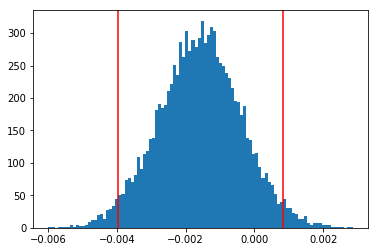

In [37]:
# Plotting sampling distribution histogram with confidence interval of 95%
lower = np.percentile(p_diffs, 2.5)
upper = np.percentile(p_diffs, 97.5)

plt.hist(p_diffs, bins=100)
plt.axvline(lower, color='r')
plt.axvline(upper, color='r');

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

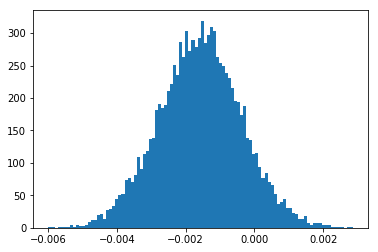

In [38]:
plt.hist(p_diffs, bins=100);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

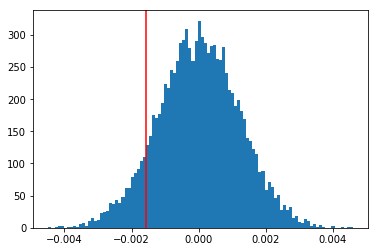

In [39]:
null_mean = 0

null_vals = np.random.normal(null_mean, np.std(p_diffs), 10000)
plt.hist(null_vals, bins=100)
plt.axvline(obs_diff, color='r');

In [40]:
(null_vals > obs_diff).mean()

0.90510000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

>As mentioned above, our type I threshold is 5%. If this threshold is compared to p value we got from calculation above, then:
$$p = 0.91 $$
$$\alpha = 0.05$$
$$p > \alpha$$<br>
<br>
We failed to reject null hypothesis. We do not have evidence that new page makes more people to take the courses. It means that the new page is not effective to attract new user conversion, or in other perspective, we can say the new page have not been effective yet to bring new user. The company should build a new page layout or wait longer to prevent biases such as change aversion or novelty effect.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted']
convert_new = df2.query('landing_page == "new_page"')['converted']
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [59]:
count = np.array([convert_old.sum(), convert_new.sum()])
nobs = np.array([n_old, n_new])
value = null_mean

z_score, p_value = sm.stats.proportions_ztest(count, nobs, value, alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**<br>
>Well, the p value is almost the same with previous calculation in part **k.** that is 0.905. In previous calculation we got p = 0.91.<br>
<br>
In z-test, one sample is used to calculate the p value with assumption that sample is normally distributed. Z-score is standardized statistic, an approximation of $\sigma^{2}$.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**<br>
>Logistic regression would be a good method for those categorical kind of data.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
# Adding intercept column
df2['intercept'] = 1

# Creating dummy for landing_page
df2 = df2.join(pd.get_dummies(df2['landing_page']))

# Translating categories in group column into 0 and 1 in ab_page column
df2['ab_page'] = df2['group'].map({"treatment" : 1, "control" : 0})
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [45]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'new_page']])
results = log_mod.fit()
results.summary2()

         Current function value: 0.366118
         Iterations: 35


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit              No. Iterations:     35.0000    
Dependent Variable:    converted          Pseudo R-squared:   0.000      
Date:                  2020-04-23 00:18   AIC:                212780.3502
No. Observations:      290584             BIC:                212801.5095
Df Model:              1                  Log-Likelihood:     -1.0639e+05
Df Residuals:          290582             LL-Null:            -1.0639e+05
Converged:             0.0000             Scale:              1.0000     
-------------------------------------------------------------------------
           Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------
intercept -1.9888      0.0081 -246.6690 0.0000       -2.0046      -1.9730
ab_page   -0.0075 704237.3061   -0.0000 1.0000 -1380279.7641 1380279.7491
new_page  -0.0075 704237.3061   -0.0000 1.0000 -1380279.7641 1380279.7491
=========================================================================

"""

>1. Iteration convergence did not achieved.
2. Confidence interval of ab_page and new_page are spread from large negatif value to large positif value.

>Those above indicating there is problem in our regression model. As we can see in ab_page and new_page, large positive and negative confidence interval value means the two variable is correlated. We should drop one of these.  

In [46]:
# Create logistic model without new_page
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-23 00:18 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
# Finding true value of variables coefficient
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.98511193960306265)

>If an individual get the new page layout, they are 0.985 times more likely to be converted than if they get the old page layout, holding all other variables constant.<br>
<br>
P value of ab_page is above our type I error threshold. It means that page type is not statistically significant relating to courses conversion.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**<br>
>P value of a variable is given to testing whether the parameter for the variable is equal to zero or not, as written in hypothesis below.
>$$H_{0}:\beta_{ab-page} = 0$$<br>
$$H_{1}:\beta_{ab-page} \neq 0$$
>P value of ab_page is above our type I error threshold. It means that we fail to reject null hypothesis above which means page type is not statistically significant relating to courses convertion (and should be dropped).<br>
<br>
Hypothesis we made in part II is for A/B testing analysis to find whether the new page layout significant enough to courses conversion.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**<br>
>1. Number of page visit<br>
Number of page visit could be indicating user interest to the course. 
2. Page reading time.<br>
Reading time also indicating whether the user is interested to the course.<br>
<br>
>Interest will lead to conversion and that make those variables above important to add into regression model.

>From those number, we can also see whether user like the new page layout or do not.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


In [49]:
# Reading country data
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [50]:
# finding unique values from country column
country_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [51]:
# Joining the dataset
df3 = df2.join(country_df.set_index('user_id'), on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [52]:
# Creating dummy for country
df3 = df3.join(pd.get_dummies(df3['country']))

In [53]:
# Create regression model
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'new_page', 'UK', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-23 00:18 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
new_page      -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

>Country does not have great impact on predicting the conversion. As we can see from regression summary above, the p value of the countries are above our 5% error threshold.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [55]:
# Creating interaction variables
df3['page_uk'] = df3['ab_page']*df3['UK']
df3['page_us'] = df3['ab_page']*df3['US']

# Regression model
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'new_page', 'UK', 'US', 'page_uk', 'page_us']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-23 00:18 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
new_page      -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
page_uk        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
page_us        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

>Countries variable is not as statistically significant as page_uk and page_us. It is a good practice to drop those insignificant variables.

In [56]:
# Regression model without country variables
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'new_page', 'page_uk', 'page_us']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-23 00:18 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0827    0.0380    -2.1763  0.0295  -0.1571  -0.0082
page_uk       0.0901    0.0405     2.2252  0.0261   0.0107   0.1694
page_us       0.0644    0.0384     1.6788  0.0932  -0.0108   0.1396
==================================================================

"""

>Well, we now have variables with better p value. Now, how about if we drop another variable that is page_us to see if there is improvement.

In [58]:
# Dropping page_us from regression model
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'new_page', 'page_uk']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-23 00:21 AIC:              212779.7977
No. Observations:   290584           BIC:              212811.5366
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0225    0.0124    -1.8170  0.0692  -0.0467   0.0018
page_uk       0.0299    0.0187     1.6007  0.1095  -0.0067   0.0664
==================================================================

"""

>Page_uk p value is rising after we dropping page_us. Here we have two variables with p value above our 5% error threshold.<br>
<br>
I think the previous model is better. So new_page, page_uk, and page_us are best variables to predict course conversion.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0